In [2]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

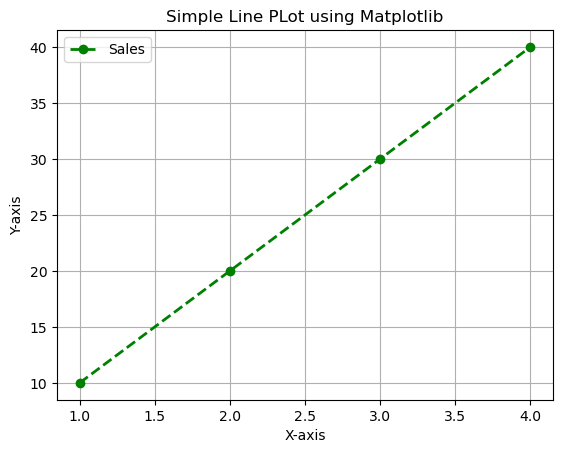

In [35]:

x = [1,2,3,4,]
y = [10,20,30,40]

plt.plot(x,y,'go--', linewidth =2, label = 'Sales')
plt.title("Simple Line PLot using Matplotlib")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()


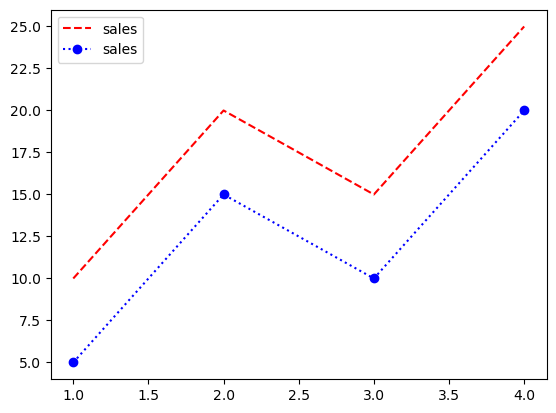

In [41]:
x = [1, 2, 3, 4]
y1 = [10, 20, 15, 25]
y2 = [5, 15, 10, 20]

plt.plot(x, y1, 'r--', x, y2, 'b:o', label = 'sales')  # Red dashed line and blue dotted line with circles
plt.legend()
plt.show()


(100,)
<class 'numpy.ndarray'>


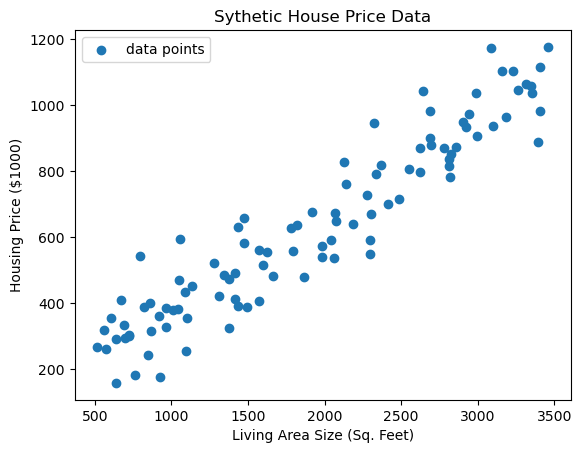

In [64]:
np.random.seed(42)

living_area = np.random.uniform(500, 3500, size= 100)

print(living_area.shape)

print(type(living_area))

true_slope = 0.3
true_intercept = 50

noise = np.random.normal(10,100, size = living_area.shape)

#print(noise)

housing_price = true_slope * living_area + true_intercept + noise

plt.scatter(living_area, housing_price, label = 'data points')
plt.title("Sythetic House Price Data")
plt.xlabel("Living Area Size (Sq. Feet)")
plt.ylabel("Housing Price ($1000)")
plt.legend()
plt.show()




## Linear Regression with SciKit-Learn

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# creating the model 
model = LinearRegression()

# Scikit-learn cannot process 1D arrays as input for X (features) or y (target).
# You need to reshape them into 2D arrays:

# living_area.reshape(-1, 1) converts it to a 2D array with shape (100, 1).
# Similarly, housing_price.reshape(-1, 1) ensures the target variable is 
# also in the correct shape.

# reshape(-1, 1) means:
# -1: Automatically infers the number of rows based on the size of the 
# array (in this case, 100 rows).
# 1: Specifies that there should be 1 column (since you have one feature).

print(living_area.shape)
print(housing_price.shape)


living_area = living_area.reshape(-1,1)
housing_price = housing_price.reshape(-1,1)

print(living_area.shape)
print(housing_price.shape)

X_train , X_test , y_train, y_test = train_test_split(living_area, housing_price, test_size =0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model.fit(X_train, y_train)

#print("Model Training is Complete.")





(100, 1)
(100, 1)
(100, 1)
(100, 1)
(80, 1) (80, 1)
(20, 1) (20, 1)


LinearRegression()

In [93]:
# claculating the mean squared error on training data

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, model.predict(X_train))
print(f"The Mean Squared Error on Training data: {mse_train:.2f}")

The Mean Squared Error on Training data: 8476.79


In [71]:
# Evaluating the model on test data 

predictions = model.predict(X_test)



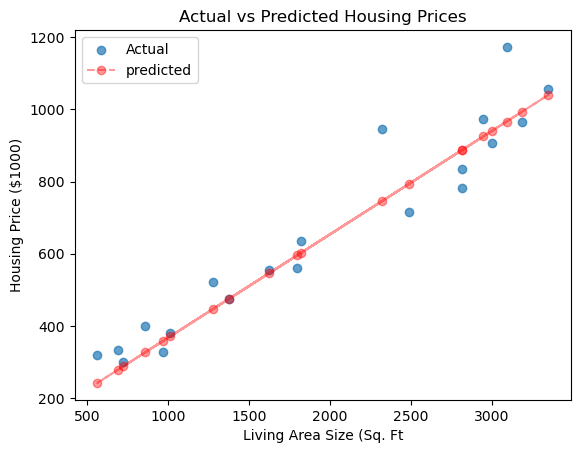

In [91]:
# PLoting the actual vs predicted values 

plt.scatter(X_test, y_test , alpha = 0.7, label = 'Actual')

# alpha is a parameter that specifies the opacity level of the plotted points.
# It takes a value between 0 and 1: 
#alpha = 0: Fully transparent (invisible).
#alpha = 1: Fully opaque (default setting).

plt.plot(X_test, predictions, 'ro--', label = 'predicted', alpha = 0.4)
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Living Area Size (Sq. Ft")
plt.ylabel("Housing Price ($1000)")
plt.legend()
plt.show()


In [92]:
# Calculating the mean squared error (MSE) on testing data
mse_test = mean_squared_error(y_test, predictions)
print(f"The Mean Squared Error on Tersing Data: {mse_test:.2f}")

The Mean Squared Error on Tersing Data: 6537.00


In [95]:
# looking at the model Coefficients

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [[0.28662158]]
Model Intercept: [80.98054336]


In [112]:
# Make a prediction for a new living area size

new_living_area = np.array([2500]).reshape(-1,1)
#new_living_area = np.array([2500])
print(new_living_area.shape)
predicted_price = model.predict(new_living_area)
print(predicted_price.shape)
print(f"Predicted Price for 2500 Sq. Ft : ${predicted_price[0][0]*1000:.2f}")

(1, 1)
(1, 1)
Predicted Price for 2500 Sq. Ft : $797534.49


## Logistic Regression with SciKit-Learn

### Generate Synthetic Movie Review Data

In [119]:
# Generate synthetic data for movie reviews sentiment analysis
np.random.seed(42)

n_samples = 100

# Create a new feature for the percentage of negative words
neg_words_neg = np.random.normal(60, 8, n_samples//2)  # Higher % negative words for negative
neg_words_pos = np.random.normal(40, 8, n_samples//2)  # Lower % negative words for positive

print(neg_words_neg)
print(neg_words_pos)

# Generate percentage with different means for each class
pos_words_neg = np.random.normal(55, 8, n_samples//2)  # Lower % positive words for negative
pos_words_pos = np.random.normal(65, 8, n_samples//2)  # Higher % positive words for positive

print(pos_words_neg)
print(pos_words_pos)

# Combine features
X = np.column_stack([
    np.concatenate([neg_words_neg, neg_words_pos]),
    np.concatenate([pos_words_neg, pos_words_pos])
])

print(X.shape)
print(X)

# Generate target labels
y = np.concatenate([np.zeros(n_samples//2), np.ones(n_samples//2)])

print(y.shape)
print(y)

[63.97371322 58.89388559 65.1815083  72.18423885 58.126773   58.12690434
 72.63370252 66.13947783 56.24420491 64.34048035 56.29265846 56.27416197
 61.93569817 44.69375804 46.20065734 55.50169977 51.89735104 62.51397866
 52.7358074  48.70157039 71.72519015 58.1937896  60.54022564 48.60201451
 55.6449382  60.88738072 50.79205138 63.00558415 55.19489048 57.66645
 55.1863471  74.81822548 59.8920222  51.53831257 66.5803593  50.2332508
 61.67090876 44.32263901 49.37451161 61.57488989 65.90773264 61.37094625
 59.07481374 57.59117044 48.17182408 54.24124633 56.31488983 68.45697781
 62.74894632 45.89567876]
[42.59267176 36.91934176 34.584624   44.89341031 48.24799618 47.45024095
 33.28625981 37.52630099 42.65010745 47.80436102 36.1666061  38.51472819
 31.14932021 30.43034701 46.50020658 50.84992023 39.42391903 48.02826318
 42.8930882  34.83904196 42.89116484 52.30429253 39.71339169 52.51714925
 19.04203917 46.57522004 40.69637655 37.6079412  40.73408621 24.09944868
 38.2426249  42.85690057 51.8

In [128]:
# show the data in a table
import pandas as pd

# create dataframe with features i.e. X

df = pd.DataFrame(X, columns = ['% Negative Words', '% Positive Words'] )

# Adding Target column 'sentiment'
df['Sentiment'] = ['Positive' if label == 1 else 'Negative' for label in y]

#print(df['sentiment'])
df.head()




,% Negative Words,% Positive Words,Sentiment
0,63.973713,43.677034,Negative
1,58.893886,51.634837,Negative
2,65.181508,52.258284,Negative
3,72.184239,48.581782,Negative
4,58.126773,53.709714,Negative


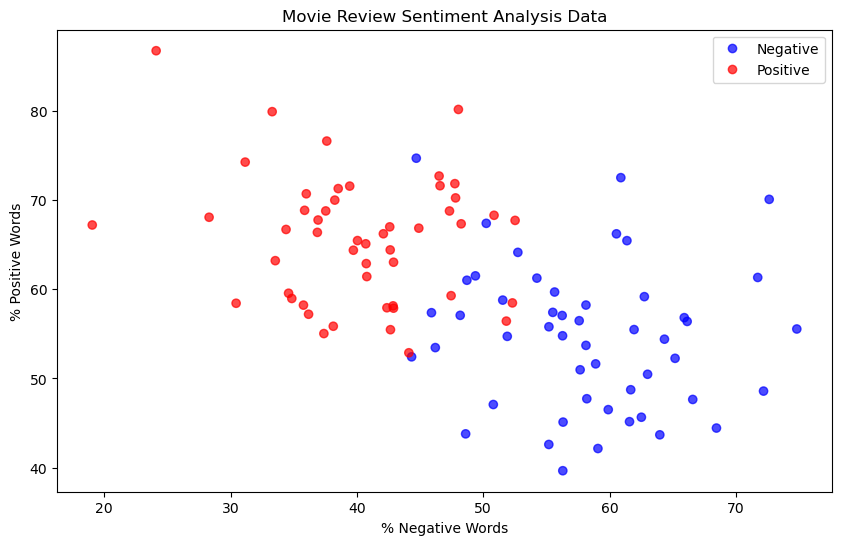

In [158]:
# Visualize the data in a Scatter plot 

plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y, alpha=0.7, cmap = 'bwr')
plt.title("Movie Review Sentiment Analysis Data")
plt.xlabel("% Negative Words")
plt.ylabel("% Positive Words")
plt.legend(handles=scatter.legend_elements()[0] ,labels = ['Negative', 'Positive'])
plt.show()

#### Logistic Regression with SciKit-Learn

In [177]:
# importing the Logistic Regression Model from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creating the model 
model = LogisticRegression(verbose= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model.fit(X_train, y_train)





(80, 2)
(20, 2)
(80,)
(20,)


LogisticRegression(verbose=True)

In [178]:
# Evaluating the model on Testing Data
predictions = model.predict(X_test)

In [179]:
print(predictions.shape, predictions[:])

(20,) [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]


In [181]:
# Checking model performance metrics 

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, predictions)

for i in range(20):
    print(f"actual : {y_test[i]}, predicted : {predictions[i]}")

print(f"Accuracy : {accuracy:.2f}")

actual : 1.0, predicted : 1.0
actual : 1.0, predicted : 1.0
actual : 1.0, predicted : 1.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 1.0, predicted : 1.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 1.0, predicted : 0.0
actual : 0.0, predicted : 0.0
actual : 1.0, predicted : 1.0
actual : 0.0, predicted : 0.0
actual : 1.0, predicted : 1.0
actual : 1.0, predicted : 1.0
actual : 0.0, predicted : 0.0
actual : 0.0, predicted : 0.0
Accuracy : 0.95


In [185]:
# Evaluating the model Performance in detail using confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

class_report = classification_report(y_test, predictions)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [186]:
conf_matrix = confusion_matrix(y_test, predictions)

In [187]:
print(conf_matrix)

[[12  0]
 [ 1  7]]


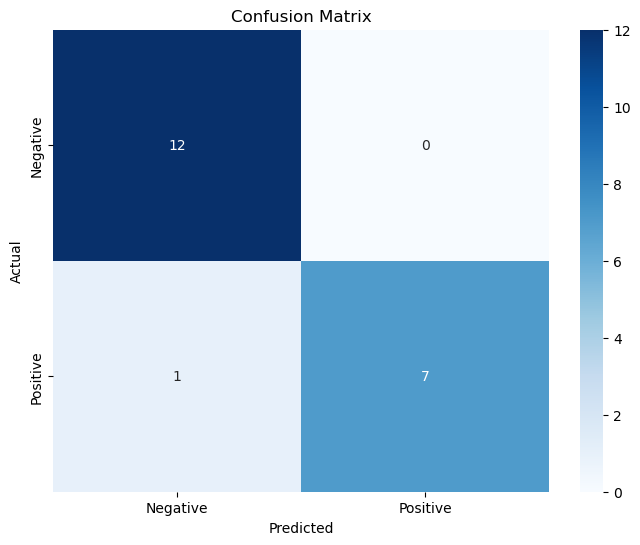

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize= (8,6))
sns.heatmap(conf_matrix, annot=True, cmap ='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

